# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

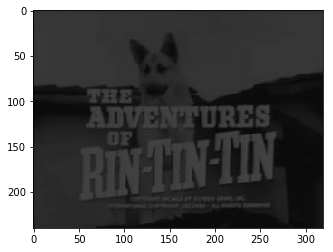

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

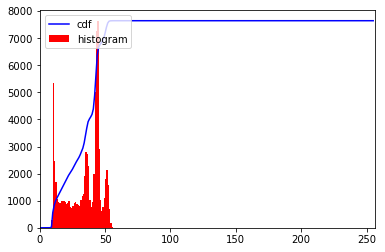

In [8]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

In [9]:
imagem_nova = np.zeros(rintin_gray.shape)

In [15]:
for i in range(len(rintin_gray)):
    linha = rintin_gray[i]
    for p in range(len(linha)):
        pixel = linha[p]
        imagem_nova[i][p] = (pixel-8)*255/50

In [16]:
print(imagem_nova)

[[  66.3  158.1  173.4 ...,  168.3  168.3  147.9]
 [  71.4  163.2  183.6 ...,  173.4  173.4  147.9]
 [  76.5  168.3  188.7 ...,  173.4  178.5  153. ]
 ..., 
 [  30.6  102.   137.7 ...,   51.    51.    45.9]
 [  40.8  107.1  142.8 ...,   51.    45.9   45.9]
 [  51.   117.3  153.  ...,   51.    45.9   45.9]]


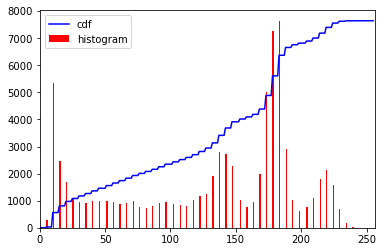

In [17]:
hist,bins = np.histogram(imagem_nova.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(imagem_nova.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

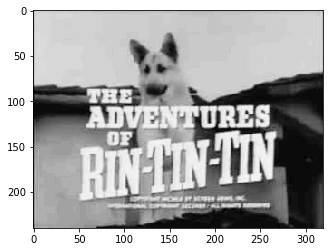

In [18]:
plt.imshow(imagem_nova, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [2]:
cxs = cv2.imread("hall_box_battery1.jpg")

In [3]:
B = cxs[:,:,0]
R = cxs[:,:,2]

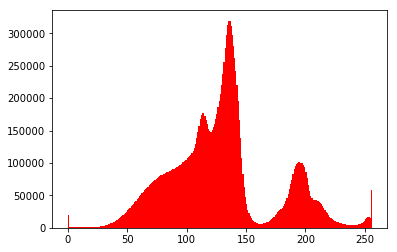

In [4]:
plt.hist(R.flatten(),256,[0,256],color="r");

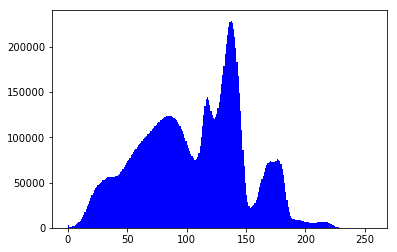

In [5]:
plt.hist(B.flatten(),256,[0,256],color="b");

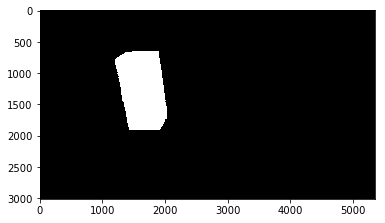

In [6]:
hsv = cv2.cvtColor(cxs, cv2.COLOR_BGR2HSV)
lower_red = np.array([0,130,160])
upper_red = np.array([10,255,255])
mask = cv2.inRange(hsv, lower_red, upper_red)
plt.imshow(mask, cmap="Greys_r")
cv2.destroyAllWindows()

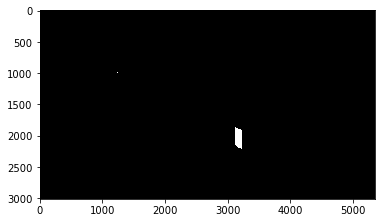

In [7]:
hsv = cv2.cvtColor(cxs, cv2.COLOR_BGR2HSV)
lower_blue = np.array([50,100,20])
upper_blue = np.array([255,255,255])
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.imshow(mask, cmap="Greys_r")
cv2.destroyAllWindows()